In [1]:
import numpy as np
import os
import tensorflow as tf
from PIL import Image

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile('trained_model/frozen_inference_graph.pb', 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [3]:
label_map = label_map_util.load_labelmap('tf_data/pascal_label_map.pbtxt')
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=2, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [4]:
PATH_TO_TEST_IMAGES_DIR = 'data/example_images/'
images = os.listdir(PATH_TO_TEST_IMAGES_DIR)

IMAGE_SIZE = (12, 8)

In [5]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

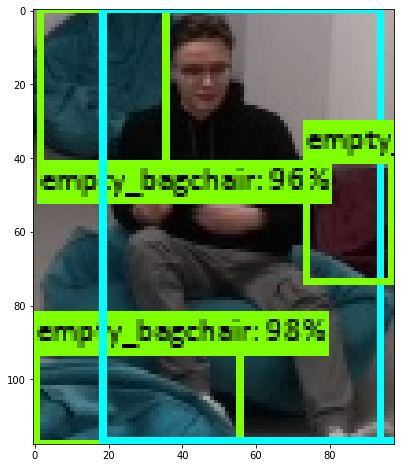

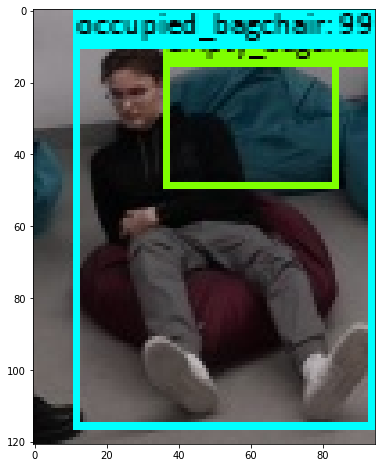

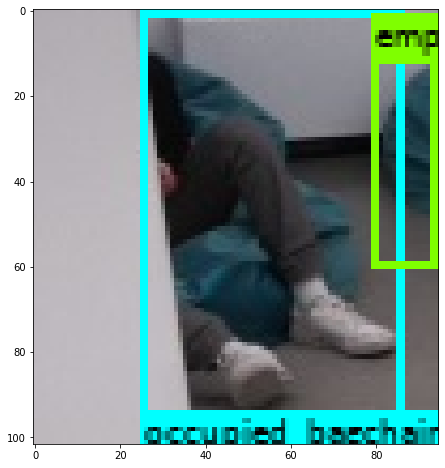

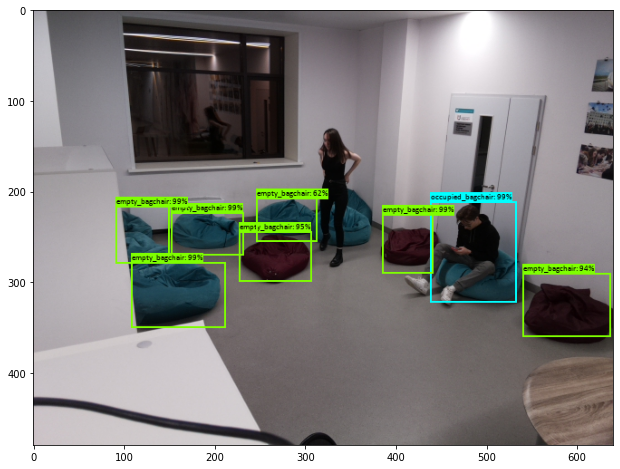

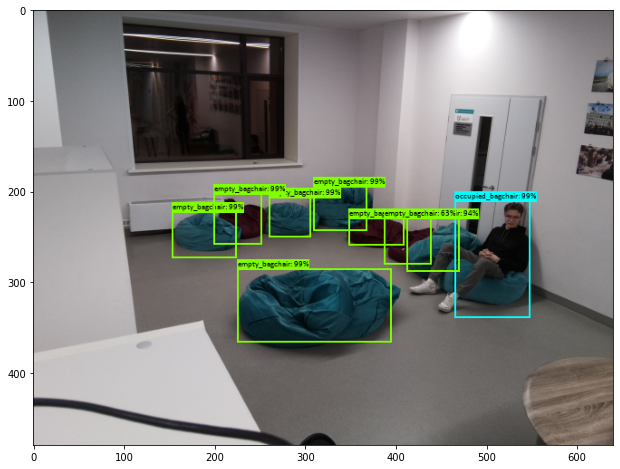

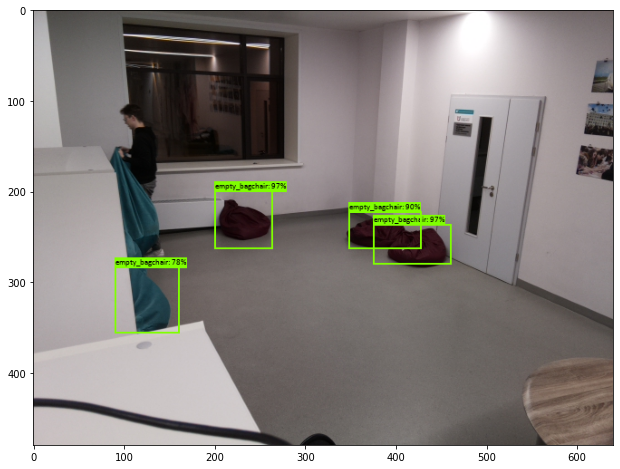

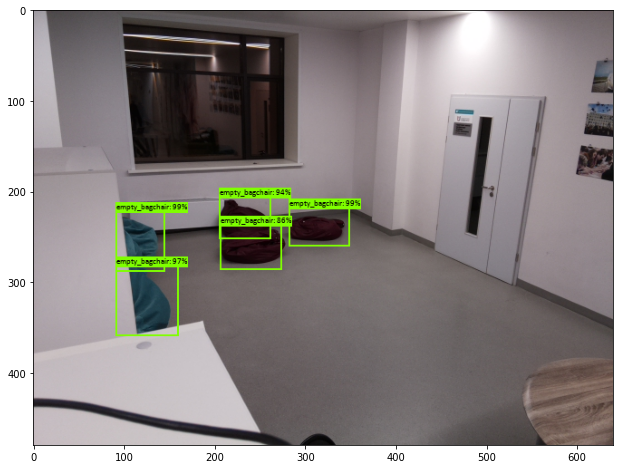

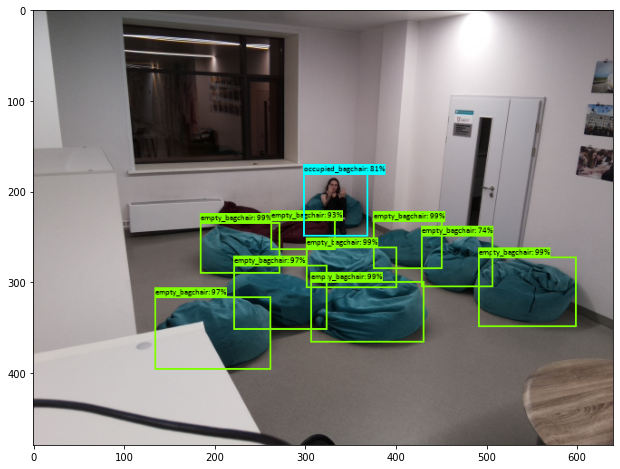

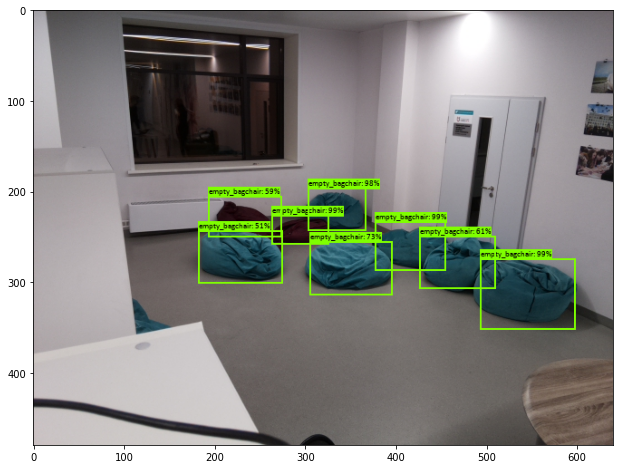

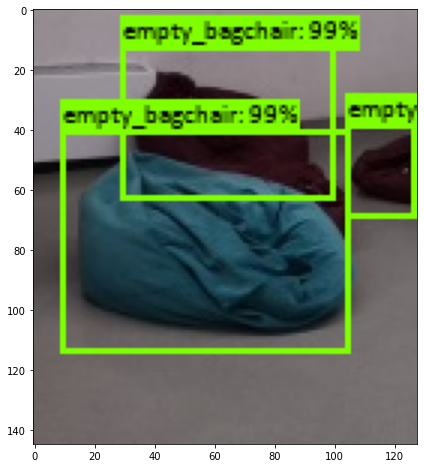

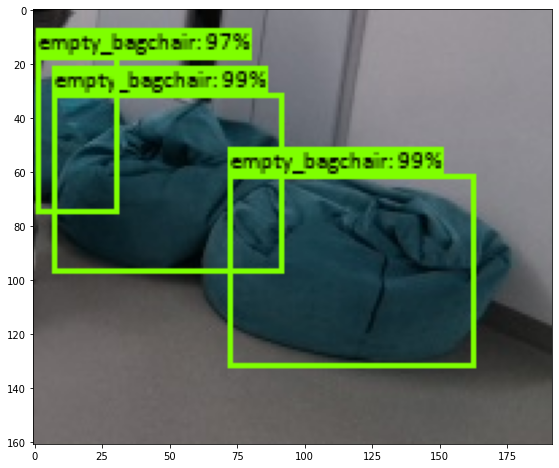

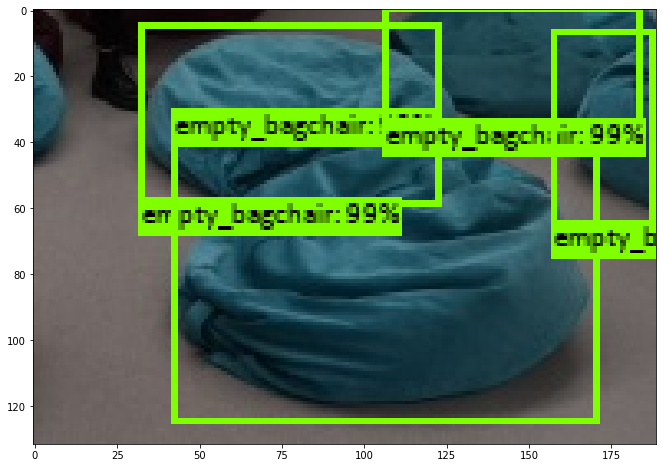

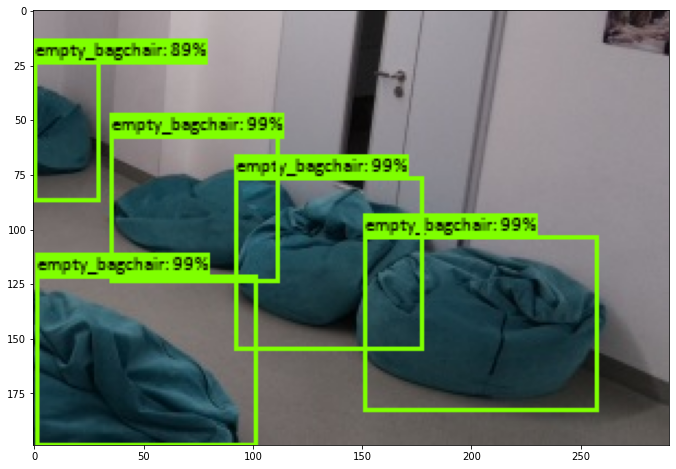

In [6]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in images:
            image = Image.open(PATH_TO_TEST_IMAGES_DIR + image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
#                 skip_labels=True,
#                 skip_scores=True,
                line_thickness=2)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)